In [94]:
import pandas as pd
import numpy as np

In [95]:
# Read the data
data = pd.read_csv('train.tsv',sep='\t', header=None, names=["id", "label", "statement", "subject(s)", "speaker","speaker's job title", "state info", "party affiliation", "barely true counts", "false counts","half true counts", "mostly true counts", "pants on fire counts", "context"])
data.head()

,id,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [96]:
from sklearn.feature_extraction.text import CountVectorizer

def get_word_freq(data):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(data)
    word_freq = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis = 0).tolist()[0]))
    return word_freq


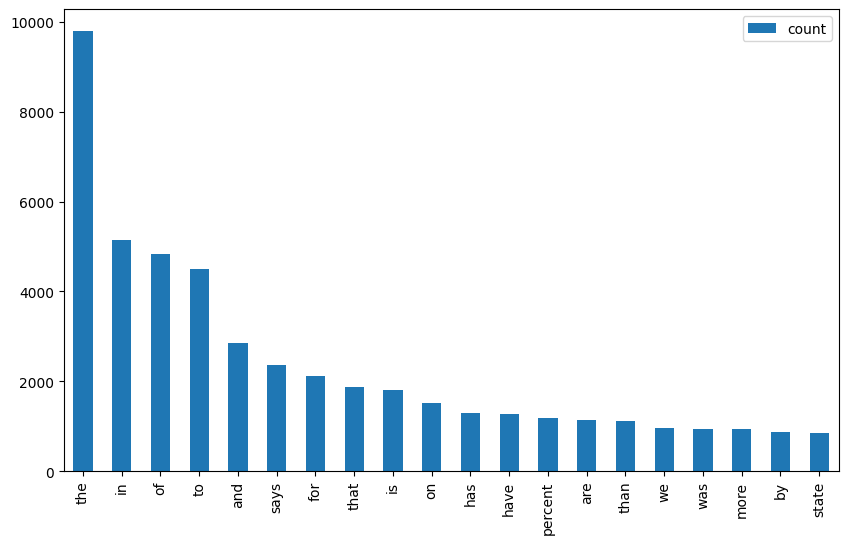

In [97]:
from matplotlib import pyplot as plt

word_freq_dict = get_word_freq(data['statement'])
word_freq = pd.DataFrame.from_dict(word_freq_dict, orient='index', columns=['count'])
word_freq = word_freq.sort_values(by=['count'], ascending=False)
word_freq.head(20).plot(kind='bar', figsize=(10,6))
plt.show()


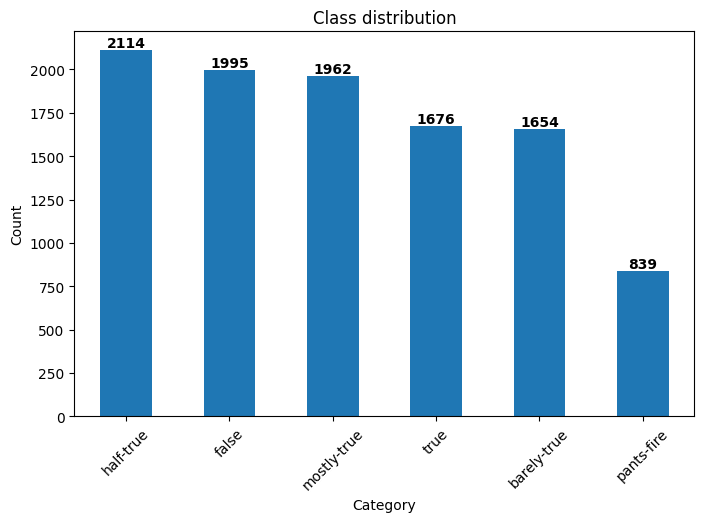

In [98]:
class_distribution = data['label'].value_counts()
plt.figure(figsize=(8,5))
bars = class_distribution.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Class distribution')
plt.xticks(rotation = 45)

for i,v in enumerate(class_distribution):
    bars.text(i, v, str(v), horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

plt.show()

In [99]:

data['label'] = data['label'].replace(['pants-fire', 'barely-true','false'], 0)
data['label'] = data['label'].replace(['half-true', 'mostly-true','true'], 1)



context = data['subject(s)'].unique()


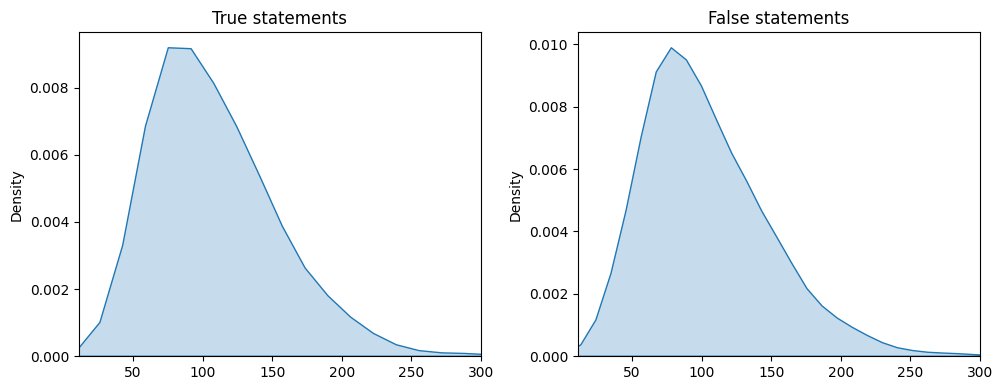

True statments statistics:

count    5752.000000
mean      109.046940
std        63.995451
min        11.000000
25%        75.000000
50%       101.000000
75%       135.000000
max      3204.000000
Name: statement, dtype: float64

Fake statments statistics:

count    4488.000000
mean      104.197638
std        54.393652
min        11.000000
25%        71.000000
50%        96.000000
75%       130.000000
max      2107.000000
Name: statement, dtype: float64


In [100]:
import seaborn as sns

# length_of_true_statments  = data.loc[(data['label'] == 'true') | (data['label'] == 'mostly=true') |(data['label']=='half-true'), 'statement'].apply(len) 
# length_of_false_statments = data.loc[(data['label']=='false')| (data['label']=='barely-true')| (data['label']=='pants-fire') , 'statement'].apply(len)


length_of_true_statments  = data.loc[(data['label'] == 1), 'statement'].apply(len) 
length_of_false_statments = data.loc[(data['label']== 0), 'statement'].apply(len)



fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.kdeplot(np.array(length_of_true_statments), fill=True, ax=axes[0])
axes[0].set_title('True statements')
axes[0].set_xlim(11, 300)

sns.kdeplot(np.array(length_of_false_statments), fill=True, ax=axes[1])
axes[1].set_title('False statements')
plt.tight_layout()
axes[1].set_xlim(11, 300)
plt.show()

print("True statments statistics:\n")
print(length_of_true_statments.describe())

print("\nFake statments statistics:\n")
print(length_of_false_statments.describe())

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer


# features_df = data[['statement', 'subject(s)', 'speaker', "speaker's job title", 'state info', 'party affiliation', 'context']]
label_df = data['label']

combined_features = data[['statement']].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
vectorizer  = TfidfVectorizer()

vectorizer.fit(combined_features)
tfidf_features = vectorizer.transform(combined_features)

tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head()

,00,000,000new,014,02,024,029,033,036,04,...,zip,zippo,zombie,zombies,zone,zones,zoning,zoo,zuckerberg,zuckerbergs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


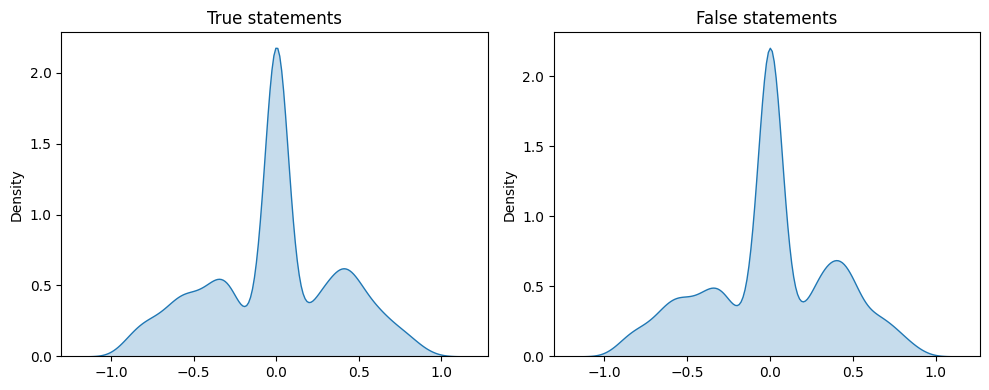

True statments statistics:

count    5752.000000
mean       -0.014910
std         0.393418
min        -0.974400
25%        -0.280775
50%         0.000000
75%         0.273200
max         0.952400
Name: statement, dtype: float64

Fake statments statistics:

count    4488.000000
mean        0.004276
std         0.382565
min        -0.973500
25%        -0.241100
50%         0.000000
75%         0.291350
max         0.937100
Name: statement, dtype: float64


In [121]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

def analyze_sentiment(text):
    words = word_tokenize(text)
    
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)

    sentiment_scores = sid.polarity_scores(filtered_text)
    return sentiment_scores['compound']

stop_words = set(stopwords.words('english'))

sid = SentimentIntensityAnalyzer()

true_sentence_sentiment = data.loc[(data['label'] == 1), 'statement'].apply(analyze_sentiment)
false_sentence_sentiment = data.loc[(data['label'] == 0), 'statement'].apply(analyze_sentiment)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.kdeplot(np.array(true_sentence_sentiment), fill=True, ax=axes[0])
axes[0].set_title('True statements')
# axes[0].set_xlim(11, 300)

sns.kdeplot(np.array(false_sentence_sentiment), fill=True, ax=axes[1])
axes[1].set_title('False statements')
plt.tight_layout()
# axes[1].set_xlim(11, 300)
plt.show()

print("True statments statistics:\n")
print(true_sentence_sentiment.describe())

print("\nFake statments statistics:\n")
print(false_sentence_sentiment.describe())



In [122]:
#import naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0, 2))
# sentiment_scores = pd.concat([true_sentence_sentiment, false_sentence_sentiment]).reset_index(drop=True)
# X_train = scaler.fit(sentiment_scores)
sentiment_scores = data['statement'].apply(analyze_sentiment)
sentiment_scores_df = sentiment_scores.to_frame().reset_index(drop=True)

features_df = pd.concat([tfidf_df, sentiment_scores_df], axis=1)
features_df = features_df.rename(columns={"statement":"Sentiment_Score"})

features_df.head()
features_df['Sentiment_Score'] = scaler.fit_transform(features_df[['Sentiment_Score']])
features_df.head()

nb_classifier = MultinomialNB()
nb_classifier.fit(features_df, label_df)
nb_classifier.score(features_df, label_df)
features_df.head()
# features_df['statement']

,00,000,000new,014,02,024,029,033,036,04,...,zippo,zombie,zombies,zone,zones,zoning,zoo,zuckerberg,zuckerbergs,Sentiment_Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.270916
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386340
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.341706
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.798111
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.011418


In [128]:
validation_data = pd.read_csv('train.tsv',sep='\t', header=None, names=["id", "label", "statement", "subject(s)", "speaker","speaker's job title", "state info", "party affiliation", "barely true counts", "false counts","half true counts", "mostly true counts", "pants on fire counts", "context"])
print(validation_data.head())

validation_features = vectorizer.transform(validation_data['statement'])
validation_features_df  =pd.DataFrame(validation_features.toarray(), columns=vectorizer.get_feature_names_out())
validation_features_df.head()

sentence_sentimennts = validation_data['statement'].apply(analyze_sentiment)
sentence_sentiments_df = sentence_sentimennts.to_frame().reset_index(drop=True)
sentence_sentiments_df = sentence_sentiments_df.rename(columns={"statement":"Sentiment_Score"})

sentence_sentiments_df['Sentiment_Score'] = scaler.fit_transform(sentence_sentiments_df[['Sentiment_Score']])

test = pd.concat([validation_features_df, sentence_sentiments_df], axis=1)

test.drop(['statement'], axis=1, inplace=True)

for feature in features_df.columns:
    if feature not in test.columns:
        print(feature)
nb_classifier.score(test, validation_data['label'])
dataframes = [test, features_df]
all([len(dataframes[0].columns.intersection(df.columns)) 
      == dataframes[0].shape[1] for df in dataframes])


           id        label                                          statement   
0   2635.json        false  Says the Annies List political group supports ...  \
1  10540.json    half-true  When did the decline of coal start? It started...   
2    324.json  mostly-true  Hillary Clinton agrees with John McCain "by vo...   
3   1123.json        false  Health care reform legislation is likely to ma...   
4   9028.json    half-true  The economic turnaround started at the end of ...   

                           subject(s)         speaker   speaker's job title   
0                            abortion    dwayne-bohac  State representative  \
1  energy,history,job-accomplishments  scott-surovell        State delegate   
2                      foreign-policy    barack-obama             President   
3                         health-care    blog-posting                   NaN   
4                        economy,jobs   charlie-crist                   NaN   

  state info party affiliation  barely

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.
